In [1]:
# load in lirbaries
import numpy as np 
import pandas as pd 
import cv2 

### download

In [6]:
#download the data
import kagglehub
pathA = kagglehub.dataset_download("dextershepherd/repetative-dataset")
print(">>>>>>>>>>",pathA)
import subprocess
import shutil
path="/mnt/data0/drs25/data/same/"
if os.path.isdir(path):
    # Remove everything inside, but keep the folder itself
    for item in os.listdir(path):
        item_path = os.path.join(path, item)
        if os.path.isfile(item_path) or os.path.islink(item_path):
            os.unlink(item_path)  # remove file or symlink
        elif os.path.isdir(item_path):
            shutil.rmtree(item_path)  # remove directory
    print(f"Contents of {path} removed, folder kept.")
else:
    print(f"{path} is not a directory.")
result = subprocess.run(["mv", pathA, "/mnt/data0/drs25/data/same/"], capture_output=True, text=True)
pathA="/mnt/data0/drs25/data/same/"+str(pathA.split("/")[-1])+"/"
datapath=pathA
import os 
files=os.listdir(datapath)
dataset= pd.DataFrame({
    'Index':[],
    'Filament':[],
    'Pattern':[],
    'Printer':[],
    "Pressure":[]
})
X=[]
idx=0
percentage=0.4
for i,file in enumerate(files):
    data=np.load(datapath+"/"+file)
    info=file.replace(".npy","").split("_")
    data=data.reshape((1*2*5*5,480,640,3))
    print(file,data.shape)
    for image in data:
        gray = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])
        h=int(image.shape[0]*percentage)
        w=int(image.shape[1]*percentage)
        gray = cv2.resize(gray,(w,h),interpolation=cv2.INTER_AREA)
        X.append(gray)
        new_row = pd.DataFrame([{
        'Index': int(idx),
        'Filament': info[0],
        'Pattern': info[1],
        'Printer': info[3],
        'Pressure': info[2]
    }])
        idx+=1
        dataset = pd.concat([dataset, new_row], ignore_index=True)

dataset.head()
X=np.array(X).reshape(len(X),1,h,w)
np.save("/mnt/data0/drs25/data/optical-tactile-dataset-for-textures/3DPrinted_same",X)
dataset.to_csv("/its/home/drs25/3D-textures/Experimental/data/meta3DPrinted_same.csv")
print(X.shape,len(dataset))

>>>>>>>>>> /its/home/drs25/.cache/kagglehub/datasets/dextershepherd/repetative-dataset/versions/1
Contents of /mnt/data0/drs25/data/same/ removed, folder kept.
PLAplus_z0.1_P30_ender.npy (50, 480, 640, 3)
PLAplus_z0.2_P30_ender.npy (50, 480, 640, 3)
PLAplus_z0.3_P30_ender.npy (50, 480, 640, 3)
PLAplus_z0.4_P30_ender.npy (50, 480, 640, 3)
PLAplus_z1.1_P30_ender.npy (50, 480, 640, 3)
PLAplus_z1.2_P30_ender.npy (50, 480, 640, 3)
PLAplus_z1.3_P30_ender.npy (50, 480, 640, 3)
PLAplus_z1.4_P30_ender.npy (50, 480, 640, 3)
PLAplus_z2.1_P30_ender.npy (50, 480, 640, 3)
PLAplus_z2.2_P30_ender.npy (50, 480, 640, 3)
PLAplus_z2.3_P30_ender.npy (50, 480, 640, 3)
PLAplus_z2.4_P30_ender.npy (50, 480, 640, 3)
PLAplus_z3.1_P30_ender.npy (50, 480, 640, 3)
PLAplus_z3.2_P30_ender.npy (50, 480, 640, 3)
PLAplus_z3.3_P30_ender.npy (50, 480, 640, 3)
PLAplus_z3.4_P30_ender.npy (50, 480, 640, 3)
PLAplus_z4.1_P30_ender.npy (50, 480, 640, 3)
PLAplus_z4.2_P30_ender.npy (50, 480, 640, 3)
PLAplus_z4.3_P30_ender.npy (50

### load in

In [70]:
#load in data
X=np.load("/mnt/data0/drs25/data/optical-tactile-dataset-for-textures/3DPrinted_same.npy")
dataset=pd.read_csv("/its/home/drs25/3D-textures/Experimental/data/meta3DPrinted_same.csv")
print("Dataset size:",X.shape)
print(len(dataset['Filament'].unique()),len(dataset['Printer'].unique()))
dataset = dataset.applymap(lambda s: s.lower() if isinstance(s, str) else s)
dataset.head()


Dataset size: (1300, 1, 192, 256)
1 1


/tmp/ipykernel_326261/1244742636.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset = dataset.applymap(lambda s: s.lower() if isinstance(s, str) else s)


,Unnamed: 0,Index,Filament,Pattern,Printer,Pressure
0,0,0.0,plaplus,z0.1,ender,p30
1,1,1.0,plaplus,z0.1,ender,p30
2,2,2.0,plaplus,z0.1,ender,p30
3,3,3.0,plaplus,z0.1,ender,p30
4,4,4.0,plaplus,z0.1,ender,p30


In [48]:
print()
print(dataset['Pattern'].unique())
print(dataset['Printer'].unique())
print(dataset['Pressure'].unique())


['plaminus' 'plaplus' 'petg' 'wood']
['z0' 'z1' 'z2' 'z3' 'z4' 'z5']
['bambu' 'ender' 'crealty' 'creality']
['p30' 'p40']


### select 

In [73]:
matrix_variance_frames=np.zeros((len(dataset['Filament'].unique()),len(dataset['Printer'].unique()),6))

for i,filament in enumerate(dataset['Filament'].unique()):
    for j,printer in enumerate(dataset['Printer'].unique()):
        for texture in range(6):
            keys=[]
            list_parts=[]
            for n in range(0,5): #number of samples
                if n==0:
                    name="z"+str(texture)#+"."+str(n)
                else: 
                    name="z"+str(texture)+"."+str(n)
                #print(name)
                z=dataset[(dataset['Pattern'] == name) & (dataset['Printer']==printer) & (dataset['Pressure']=="p30") & (dataset['Filament']==filament)]
                indicies=np.array(z['Index']).astype(np.uint8)
                frames=X[indicies]
                if len(frames)>0:
                    frames=frames.reshape((2,25,*frames.shape[2:]))
                    list_parts.append(frames)

            list_parts=np.array(list_parts)
            #print samples, trials, frame position, image*
            #print(list_parts.shape)
            if list_parts.shape[0]>0:
                ##############################
                #Variance across same image
                pixel_var = np.var(list_parts, axis=1)
                avg_var = pixel_var.mean(axis=(0,1,2,3))
                #print(avg_var)
                matrix_variance_frames[i][j][texture]=avg_var
                ###############################
                #variance across texture
                pixel_var = np.var(list_parts, axis=0)
                avg_var = pixel_var.mean(axis=(0,1,2,3))
                #print(avg_var)
                

print(matrix_variance_frames.shape)


(1, 1, 6)


In [74]:
np.average(matrix_variance_frames,axis=[0,1])

array([2.60285569, 3.17648574, 4.09965838, 5.13349055, 4.62185786,
       4.80114487])

In [77]:
matrix_variance_pairs = np.zeros((len(dataset['Filament'].unique()), 
                                  len(dataset['Printer'].unique()), 
                                  6, 6))

for i, filament in enumerate(dataset['Filament'].unique()):
    for j, printer in enumerate(dataset['Printer'].unique()):
        # collect mean image for each pattern
        pattern_means = {}
        for texture in range(6):
            list_parts = []
            for n in range(5): # number of samples
                if n == 0:
                    name = f"z{texture}"
                else:
                    name = f"z{texture}.{n}"

                z = dataset[(dataset['Pattern'] == name) & 
                            (dataset['Printer'] == printer) & 
                            (dataset['Pressure'] == "p30") & 
                            (dataset['Filament'] == filament)]
                indices = np.array(z['Index']).astype(np.uint8)
                frames = X[indices]
                if len(frames) > 0:
                    frames = frames.reshape((2,25,*frames.shape[2:]))
                    list_parts.append(frames)

            if len(list_parts) > 0:
                list_parts = np.array(list_parts)
                pattern_means[texture] = list_parts.mean(axis=0)

        # now compute pairwise variances
        textures = list(pattern_means.keys())
        for t1 in textures:
            for t2 in textures:
                if t1 != t2:
                    diff = np.var(pattern_means[t1] - pattern_means[t2])
                    matrix_variance_pairs[i, j, t1, t2] = diff

print(matrix_variance_pairs.shape)  # (filaments, printers, 6, 6)

(1, 1, 6, 6)


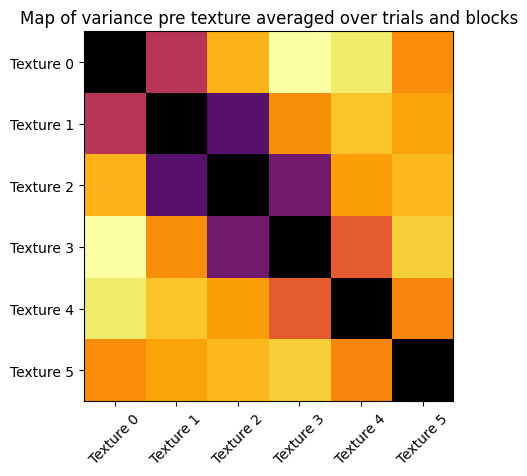

In [86]:
import matplotlib.pyplot as plt 

plt.imshow(matrix_variance_pairs[0][0],cmap="inferno")
plt.xticks([i for i in range(6)],["Texture "+str(i) for i in range(6)],rotation=45)
plt.yticks([i for i in range(6)],["Texture "+str(i) for i in range(6)])
plt.title("Map of variance pre texture averaged over trials and blocks")
plt.colorbar()
plt.show()